In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as scipy
import seaborn as sns
import decimal
import glob as glob
from scipy.stats import norm


In [2]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    
    sns.set_style("ticks")
    sns.despine()
    


set_style()

<Figure size 432x288 with 0 Axes>

In [3]:
os.chdir('/Users/alex/dna/chemshell/1bna_3_aug/opt')
h2kcal = 627.509
jmol2kcal = 0.000239006
R = 8.3145 #J /K*mol

In [4]:
def round_scientific(x):
    y = []
    for i in x:
        y.append('%.3E' % decimal.Decimal(i))
    return y


In [8]:
def pick_set(x,exclude):
    # Scans list x, returns a list without strings in pick
    check = [i for i in x if not any([e for e in exclude if e in i])]
    return check

# Exclude this list
dpt = ['rep_101', 'rep_115', 'rep_121', 'rep_122']

In [9]:
raw_elec_txt = sorted(glob.glob('./*_e.txt'))

raw_e_reac = pick_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), dpt)
raw_e_ts1  = pick_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), dpt)
raw_e_int  = pick_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), dpt)
raw_e_ts2  = pick_set((pd.read_csv(raw_elec_txt[3], header=None)[0]), dpt)
raw_e_prod = pick_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), dpt)

In [10]:
def crunch_elec(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-17:]))
    e_list = np.array(e_list)    
    return e_list

In [11]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_int  = crunch_elec(raw_e_int)
h_e_ts2  = crunch_elec(raw_e_ts2)
h_e_prod = crunch_elec(raw_e_prod)

In [12]:
round(h_e_reac.mean(), 4) , round(h_e_reac.std(), 4)

(-980.8587, 1.1014)

In [13]:
round(h_e_ts1.mean(), 4) , round(h_e_ts1.std(), 4)

(-980.8364, 1.1013)

In [14]:
round(h_e_int.mean(), 4) , round(h_e_int.std(), 4)

(-980.8374, 1.1014)

In [15]:
round(h_e_ts2.mean(), 4) , round(h_e_ts2.std(), 4)

(-980.8349, 1.1013)

In [16]:
round(h_e_prod.mean(), 4) , round(h_e_prod.std(), 4)

(-980.8372, 1.1015)

In [17]:
d_hartree_e = { 'Reactant':h_e_reac, 'TS1':h_e_ts1, 'Intermediate':h_e_int, 'TS2':h_e_ts2, 'Product':h_e_prod}

print(pd.DataFrame(data=d_hartree_e).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &    Reactant &         TS1 &  Intermediate &         TS2 &     Product \\
\midrule
0  & -980.566896 & -980.544734 &   -980.545522 & -980.544133 & -980.546879 \\
1  & -981.390939 & -981.370982 &   -981.371498 & -981.368904 & -981.370732 \\
2  & -981.161714 & -981.141532 &   -981.141998 & -981.136554 & -981.137880 \\
3  & -979.764795 & -979.741099 &   -979.743535 & -979.741486 & -979.743304 \\
4  & -979.965057 & -979.941585 &   -979.942382 & -979.938769 & -979.940339 \\
5  & -980.704808 & -980.683762 &   -980.684331 & -980.679938 & -980.681614 \\
6  & -980.262910 & -980.244131 &   -980.245672 & -980.242580 & -980.243675 \\
7  & -981.593901 & -981.570808 &   -981.572319 & -981.571685 & -981.575290 \\
8  & -979.628440 & -979.604848 &   -979.605453 & -979.602987 & -979.604748 \\
9  & -981.722215 & -981.698750 &   -981.699477 & -981.698080 & -981.701922 \\
10 & -981.099344 & -981.075910 &   -981.076009 & -981.073382 & -981.076637 \\
11 & -980.205485 & -98

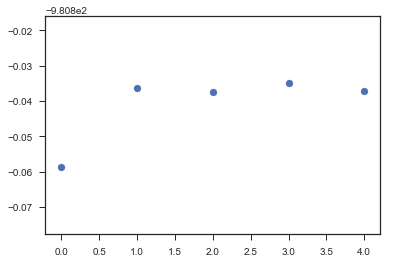

In [18]:
plt.scatter(x=[0,1,2,3,4], y=[h_e_reac.mean(), h_e_ts1.mean(), h_e_int.mean(), h_e_ts2.mean(), h_e_prod.mean()])

In [19]:
len(h_e_reac), len(h_e_ts1), len(h_e_int), len(h_e_ts2), len(h_e_prod)

(21, 21, 21, 21, 21)

In [20]:
e_reac = (h_e_reac - h_e_reac)*h2kcal
e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
e_int  = (h_e_int - h_e_reac)*h2kcal
e_ts2  = (h_e_ts2 - h_e_reac)*h2kcal
e_prod = (h_e_prod - h_e_reac)*h2kcal

In [21]:
relative_e_ts2 = (h_e_ts2 - h_e_int)*h2kcal

print(round(relative_e_ts2.mean(), 2), round(relative_e_ts2.std(), 2))

1.53 0.78


In [22]:
# Fix me

def crunch_vib_e(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-14:-2]))
    e_list = np.array(e_list)    
    return e_list

#h_vib_e_corr =  crunch_vib_e(pick_set(pd.read_csv('total_vibrational_energy_correction.txt', header=None)[0], dpt))
# The predicted Free Energies are this many kcal/mol more stable
# G_reac - E_elec_reac = 
#h_vib_e_corr.mean()*h2kcal, h_vib_e_corr.std()*h2kcal 


In [31]:
raw_gibbs_f1 = sorted(glob.glob('./rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('./rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f2 = sorted(glob.glob('./rep_???/rate/k2f/free_energy_barrier'))
raw_gibbs_r2 = sorted(glob.glob('./rep_???/rate/k2r/free_energy_barrier'))

raw_gibbs_f1 = pick_set(raw_gibbs_f1, dpt)
raw_gibbs_r1 = pick_set(raw_gibbs_r1, dpt)
raw_gibbs_f2 = pick_set(raw_gibbs_f2, dpt)
raw_gibbs_r2 = pick_set(raw_gibbs_r2, dpt)

In [32]:
raw_arrhenius_f1 = sorted(glob.glob('./rep_???/rate/k1f/arrhenius'))
raw_arrhenius_r1 = sorted(glob.glob('./rep_???/rate/k1r/arrhenius'))

raw_arrhenius_f2 = sorted(glob.glob('./rep_???/rate/k2f/arrhenius'))
raw_arrhenius_r2 = sorted(glob.glob('./rep_???/rate/k2r/arrhenius'))

raw_arrhenius_f1 = pick_set(raw_arrhenius_f1, dpt)
raw_arrhenius_r1 = pick_set(raw_arrhenius_r1, dpt)
raw_arrhenius_f2 = pick_set(raw_arrhenius_f2, dpt)
raw_arrhenius_r2 = pick_set(raw_arrhenius_r2, dpt)

In [33]:
def crunch_gibbs(x):
    final_list = []
    for i in np.arange(len(x)):
        df = pd.read_csv(x[i], skiprows=1, header=None, delim_whitespace=True)
        df[2] = df[1]*h2kcal
        df.columns = ['Temp', 'H', 'kcal']
        kcal = float(df['kcal'])
        final_list.append(kcal)
    final_list = np.array(final_list)      
    return final_list

In [34]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)
gibbs_f2 = crunch_gibbs(raw_gibbs_f2)
gibbs_r2 = crunch_gibbs(raw_gibbs_r2)

In [35]:
gibbs_r1

array([-1.10724145, -1.31579465, -1.10555875, -0.45051784, -1.25255603,
       -1.05550913, -0.96326229, -0.525381  , -1.14402014, -1.07662714,
       -1.01201446, -1.3437961 , -1.12496562, -0.99961301, -0.48031469,
       -1.09809262, -0.97530881, -0.81212378, -0.5955653 , -1.70562136,
       -1.52265374])

In [36]:
gibbs_r2

array([-0.50926591, -1.34676877, -1.02120519, -1.183894  , -1.50686025,
       -0.76528085, -0.40073089,  0.09419545, -1.22151309,  0.22851762,
       -0.34739905, -0.67883147, -1.68450608, -1.22188231, -0.46028774,
       -1.14596966, -0.94473039,  0.02350512, -1.69195227, -1.76513542,
       -0.67694061])

In [27]:
print(round(gibbs_f2.mean(), 2), round(gibbs_f2.std(), 2))

0.09 0.64


In [26]:
gibbs_ts1  = gibbs_f1
gibbs_int  = gibbs_ts1 - gibbs_r1
gibbs_ts2  = gibbs_int + gibbs_f2
gibbs_prod = gibbs_ts2 - gibbs_r2

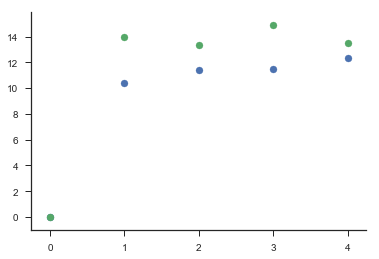

In [30]:
plt.scatter(x=[0,1,2,3,4], y=[0,gibbs_ts1.mean(), gibbs_int.mean(), gibbs_ts2.mean(), gibbs_prod.mean()])
plt.scatter(x=[0,1,2,3,4], y=[0,e_ts1.mean(), e_int.mean(), e_ts2.mean(), e_prod.mean()])
set_style()

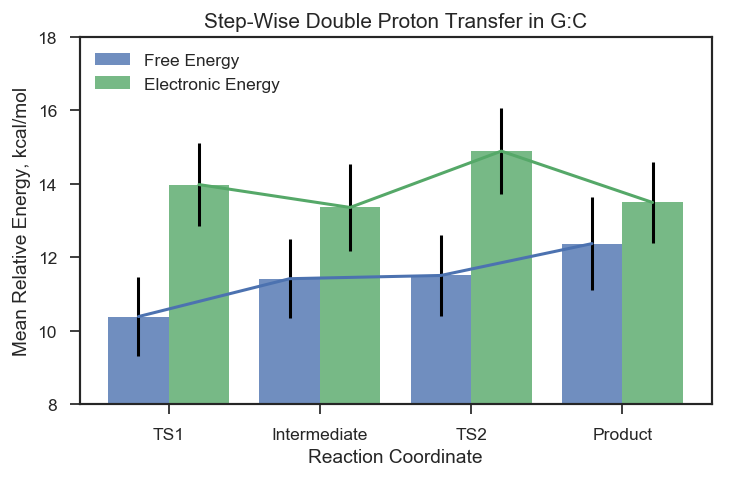

In [31]:
rxn_coord1 = ['TS1', 'Intermediate', 'TS2', 'Product']

y_pos = [ gibbs_ts1.mean(), gibbs_int.mean(), gibbs_ts2.mean(), gibbs_prod.mean()]
error = [ gibbs_ts1.std(), gibbs_int.std(), gibbs_ts2.std(), gibbs_prod.std()]

y_pos_e = [ e_ts1.mean(), e_int.mean(), e_ts2.mean(), e_prod.mean()]
error_e = [ e_ts1.std(), e_int.std(), e_ts2.std(), e_prod.std()]

x_pos = np.arange(len(rxn_coord1))

fig, ax = plt.subplots(dpi=125)

ax.bar(x_pos, y_pos,yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10, width=0.4, label='Free Energy')
ax.bar(x_pos+0.4, y_pos_e,yerr=error_e, align='center', alpha=0.8, ecolor='black', capsize=10, width=0.4, label='Electronic Energy')

ax.plot(x_pos, y_pos)
ax.plot(x_pos+0.4, y_pos_e)


ax.set_xticks(x_pos+0.2)
ax.set_xticklabels(rxn_coord1)
ax.set_xlabel('Reaction Coordinate')

ax.set_title('Step-Wise Double Proton Transfer in G:C')
ax.set_ylabel('Mean Relative Energy, kcal/mol')

plt.ylim(8,18)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.show()

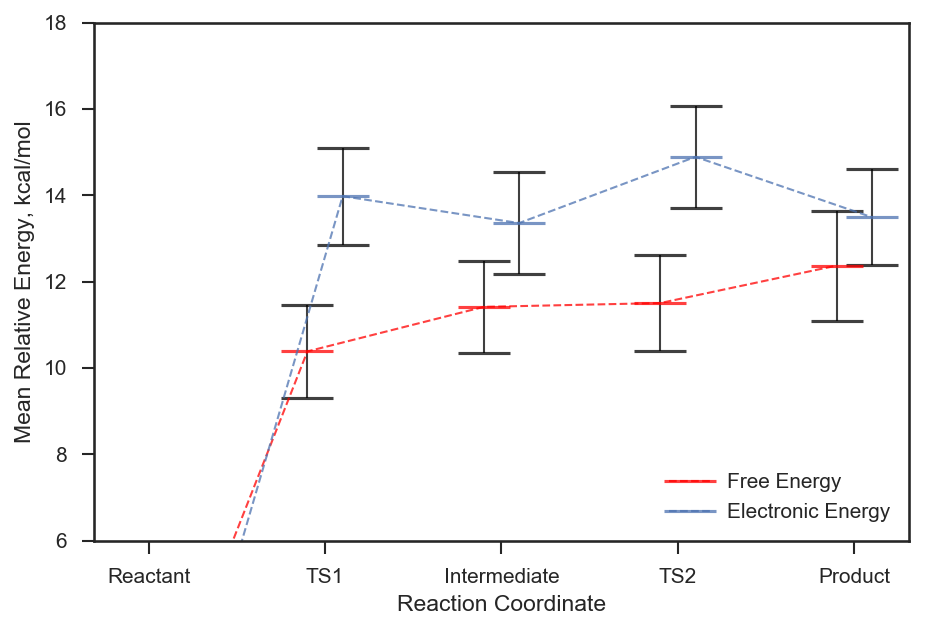

In [32]:
rxn_coord1 = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product']

y_pos = [ 0, gibbs_ts1.mean(), gibbs_int.mean(), gibbs_ts2.mean(), gibbs_prod.mean()]
error = [ 0, gibbs_ts1.std(), gibbs_int.std(), gibbs_ts2.std(), gibbs_prod.std()]

y_pos_e = [ 0, e_ts1.mean(), e_int.mean(), e_ts2.mean(), e_prod.mean()]
error_e = [ 0, e_ts1.std(), e_int.std(), e_ts2.std(), e_prod.std()]

x_pos = np.arange(len(rxn_coord1))

fig, ax = plt.subplots(dpi=150)

ax.errorbar(x_pos,y_pos,yerr=error, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Free Energy', color='red' )
ax.errorbar(x_pos+0.2,y_pos_e,yerr=error_e, ecolor='black',capsize=12.5, alpha=0.75, marker='_',ms=25,mew=1.5, ls='--', lw=1, label='Electronic Energy', )

ax.set_xticks(x_pos+0.1)
ax.set_xticklabels(rxn_coord1)
ax.set_xlabel('Reaction Coordinate')

#ax.set_title('Step-Wise Double Proton Transfer in G:C')
ax.set_ylabel('Mean Relative Energy, kcal/mol')

plt.ylim(6,18)

handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]

#plt.axhline(6.1, color='black')
#plt.axvline(0, color='black')

plt.legend(handles, labels, loc='lower right', framealpha=0)
plt.tight_layout(0)

# Run once with white grid, then again with dark grid
#sns.set_style("whitegrid", {'grid.linestyle': '--'})

plt.show()
#fig.savefig('qmmm_rxn_coord_gc_step_wise.png', transparent=True)

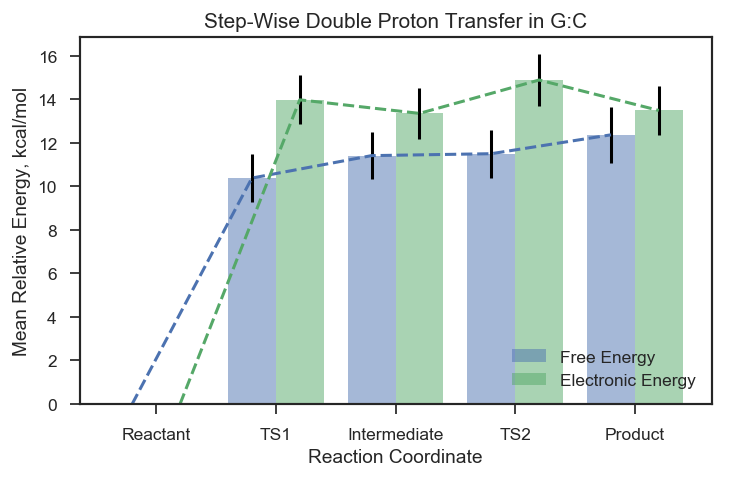

In [33]:
rxn_coord1 = ['Reactant', 'TS1', 'Intermediate', 'TS2', 'Product']

y_pos = [ 0,gibbs_ts1.mean(), gibbs_int.mean(), gibbs_ts2.mean(), gibbs_prod.mean()]
error = [ 0,gibbs_ts1.std(), gibbs_int.std(), gibbs_ts2.std(), gibbs_prod.std()]

y_pos_e = [ 0,e_ts1.mean(), e_int.mean(), e_ts2.mean(), e_prod.mean()]
error_e = [ 0,e_ts1.std(), e_int.std(), e_ts2.std(), e_prod.std()]

x_pos = np.arange(len(rxn_coord1))

fig, ax = plt.subplots(dpi=125)

ax.bar(x_pos, y_pos,yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Free Energy')
ax.bar(x_pos+0.4, y_pos_e,yerr=error_e, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.4, label='Electronic Energy')

ax.plot(x_pos, y_pos, '--')
ax.plot(x_pos+0.4, y_pos_e, '--')


ax.set_xticks(x_pos+0.2)
ax.set_xticklabels(rxn_coord1)
ax.set_xlabel('Reaction Coordinate')

ax.set_title('Step-Wise Double Proton Transfer in G:C')
ax.set_ylabel('Mean Relative Energy, kcal/mol')

#plt.ylim(8,18)

plt.legend(loc='lower right')
plt.tight_layout()
#plt.show()

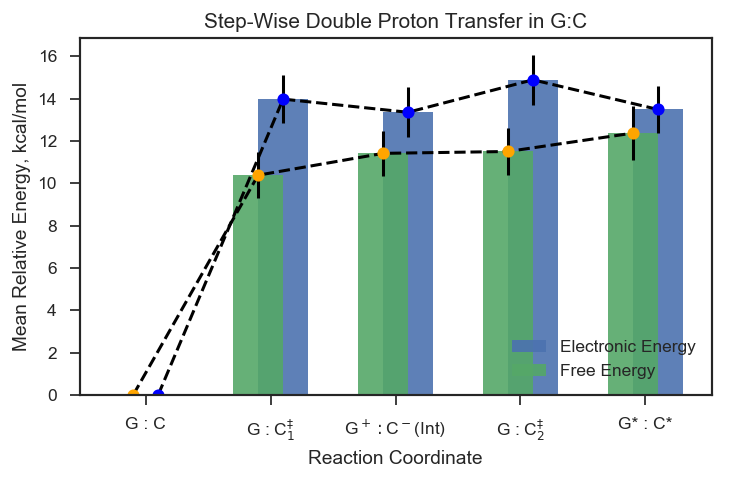

In [34]:
rxn_coord1 = ['G : C', r'G : C$^\ddag_1$', r'G$^+:$C$^-$(Int)', r'G : C$^\ddag_2$', 'G* : C*']

y_pos = [ 0,gibbs_ts1.mean(), gibbs_int.mean(), gibbs_ts2.mean(), gibbs_prod.mean()]
error = [ 0,gibbs_ts1.std(), gibbs_int.std(), gibbs_ts2.std(), gibbs_prod.std()]

y_pos_e = [ 0,e_ts1.mean(), e_int.mean(), e_ts2.mean(), e_prod.mean()]
error_e = [ 0,e_ts1.std(), e_int.std(), e_ts2.std(), e_prod.std()]

x_pos = np.arange(len(rxn_coord1))

fig, ax = plt.subplots(dpi=125)

ax.bar(x_pos+0.2, y_pos_e,yerr=error_e, align='center', alpha=0.9, ecolor='black', capsize=10, width=0.4, label='Electronic Energy')

ax.bar(x_pos, y_pos,yerr=error, align='center', alpha=0.9, ecolor='black', capsize=10, width=0.4, label='Free Energy')

ax.plot(x_pos+0.2, y_pos_e, 'o--k', mec='black', mfc='blue')

ax.plot(x_pos, y_pos, 'o--k', mec='black', mfc='orange')


ax.set_xticks(x_pos+0.1)
ax.set_xticklabels(rxn_coord1)
ax.set_xlabel('Reaction Coordinate')

ax.set_title('Step-Wise Double Proton Transfer in G:C')
ax.set_ylabel('Mean Relative Energy, kcal/mol')

#plt.ylim(8,18)


plt.legend(loc='lower right')
plt.tight_layout()

#plt.savefig('qmmm_rxn_coord_gc_step_wise')
#plt.show()



/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


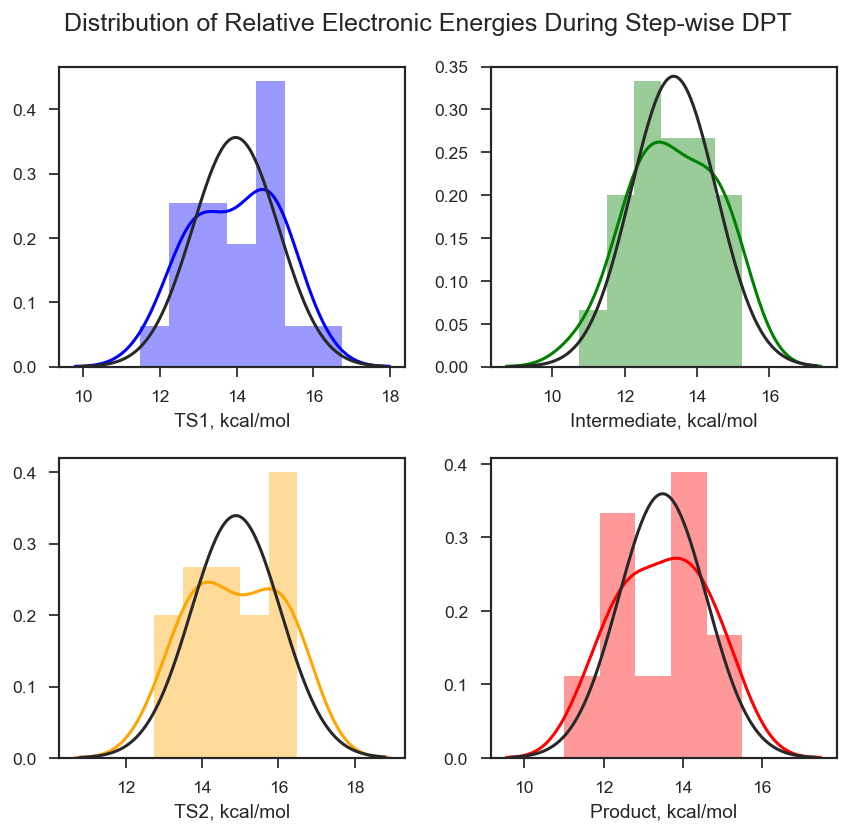

In [35]:
# plot
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False, dpi=125)

BinMin, BinMax = int(e_ts1.min())-1, int(e_ts1.max())+1
newBins = np.arange(BinMin, BinMax,0.75)
sns.distplot( e_ts1 , color="blue", ax=axes[0, 0], fit=norm, kde=True, norm_hist=True, bins=newBins, axlabel='TS1, kcal/mol')

BinMin, BinMax = int(e_int.min()), int(e_int.max())+1
newBins = np.arange(BinMin, BinMax,0.75)
sns.distplot( e_int , color="green", ax=axes[0, 1], fit=norm, kde=True, norm_hist=True, bins=newBins, axlabel='Intermediate, kcal/mol')

BinMin, BinMax = int(e_ts2.min()), int(e_ts2.max())+1
newBins = np.arange(BinMin, BinMax,0.75)
sns.distplot( e_ts2 , color="orange", ax=axes[1, 0], fit=norm, kde=True, norm_hist=True, bins=newBins, axlabel='TS2, kcal/mol')

BinMin, BinMax = int(e_prod.min()), int(e_prod.max())+1
newBins = np.arange(BinMin, BinMax,0.9)
sns.distplot( e_prod , color="red", ax=axes[1, 1], fit=norm, kde=True, norm_hist=True, bins=newBins, axlabel='Product, kcal/mol')

plt.suptitle('Distribution of Relative Electronic Energies During Step-wise DPT')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#plt.show()#

In [37]:
def crunch_rate(x):
    final_list = []
    for i in np.arange(len(x)):
        df = pd.read_csv(x[i], header=None, delim_whitespace=True, skiprows=2)
        df = np.float((df[1])[1])
        final_list.append(df)
    final_list=np.array(final_list)    
    return final_list

In [40]:
rate_f1 = crunch_rate(raw_arrhenius_f1)
rate_r1 = crunch_rate(raw_arrhenius_r1)

rate_f2 = crunch_rate(raw_arrhenius_f2)
rate_r2 = crunch_rate(raw_arrhenius_r2)

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


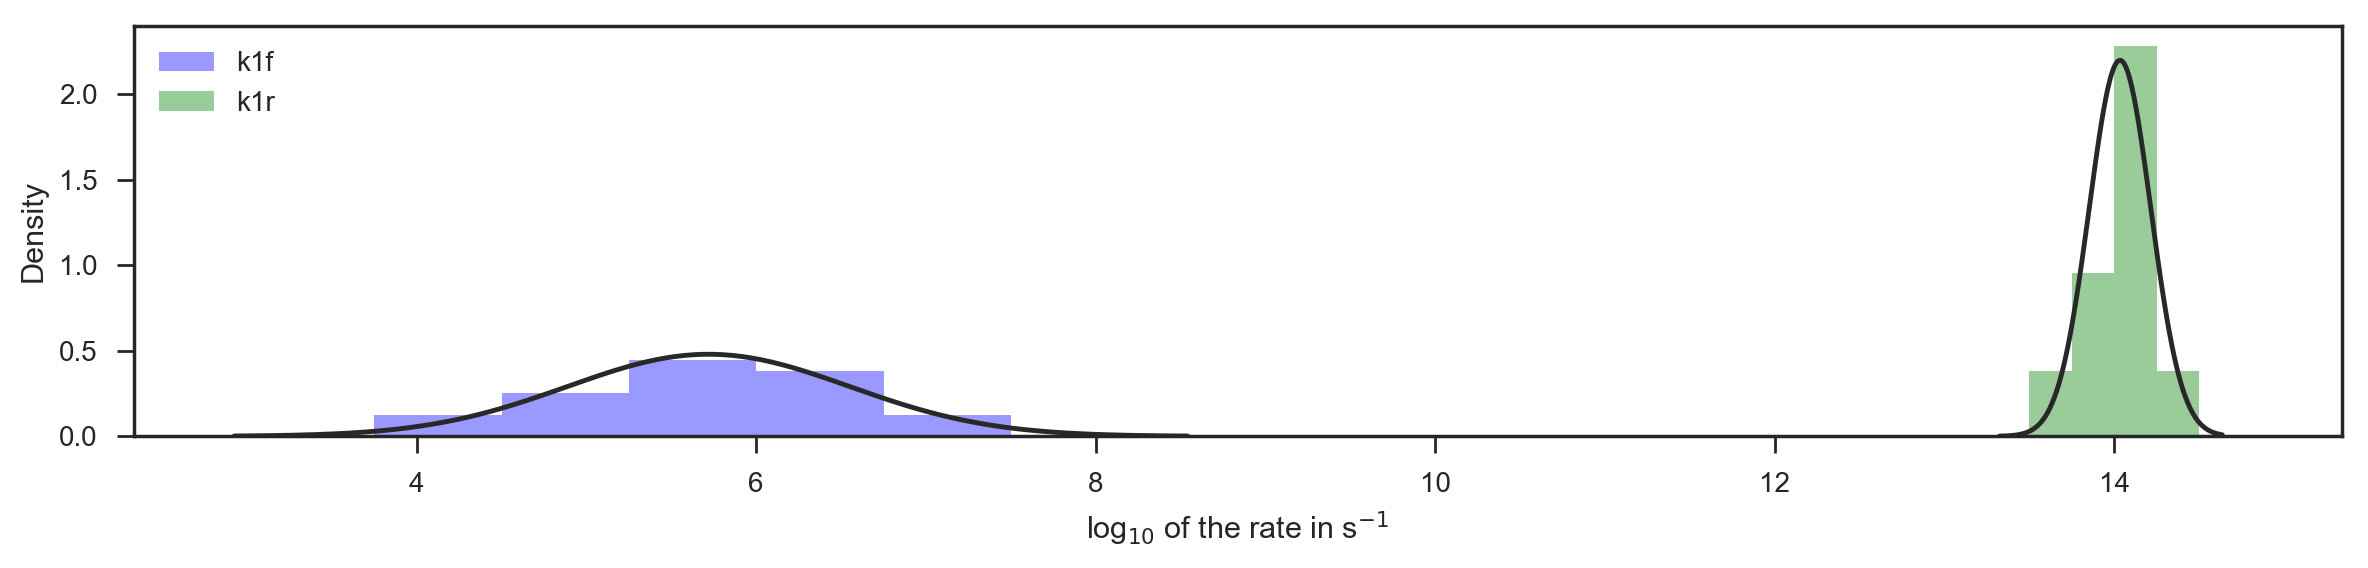

In [41]:
# plot
plt.figure(figsize=(12, 3), dpi=200)

BinMin, BinMax = int(rate_f1.min())-1, int(rate_f1.max())+1
newBins = np.arange(BinMin, BinMax,0.75)
sns.distplot( rate_f1 , color="blue", fit=norm, kde=None, norm_hist=True, bins=newBins, label='k1f')

BinMin, BinMax = int(rate_r1.min())-1, int(rate_r1.max())+1
newBins = np.arange(BinMin, BinMax,0.25)
sns.distplot( rate_r1 , color="green", fit=norm, kde=None, norm_hist=True,  bins=newBins, label='k1r')

plt.xlabel('log$_{10}$ of the rate in s$^{−1}$')
plt.ylabel('Density')
#plt.title('Histogram of rates for frist step in step-wise DPT fit to a normal distribution')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('qmmm_gc_step_wise_k1_histogram.png')


/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


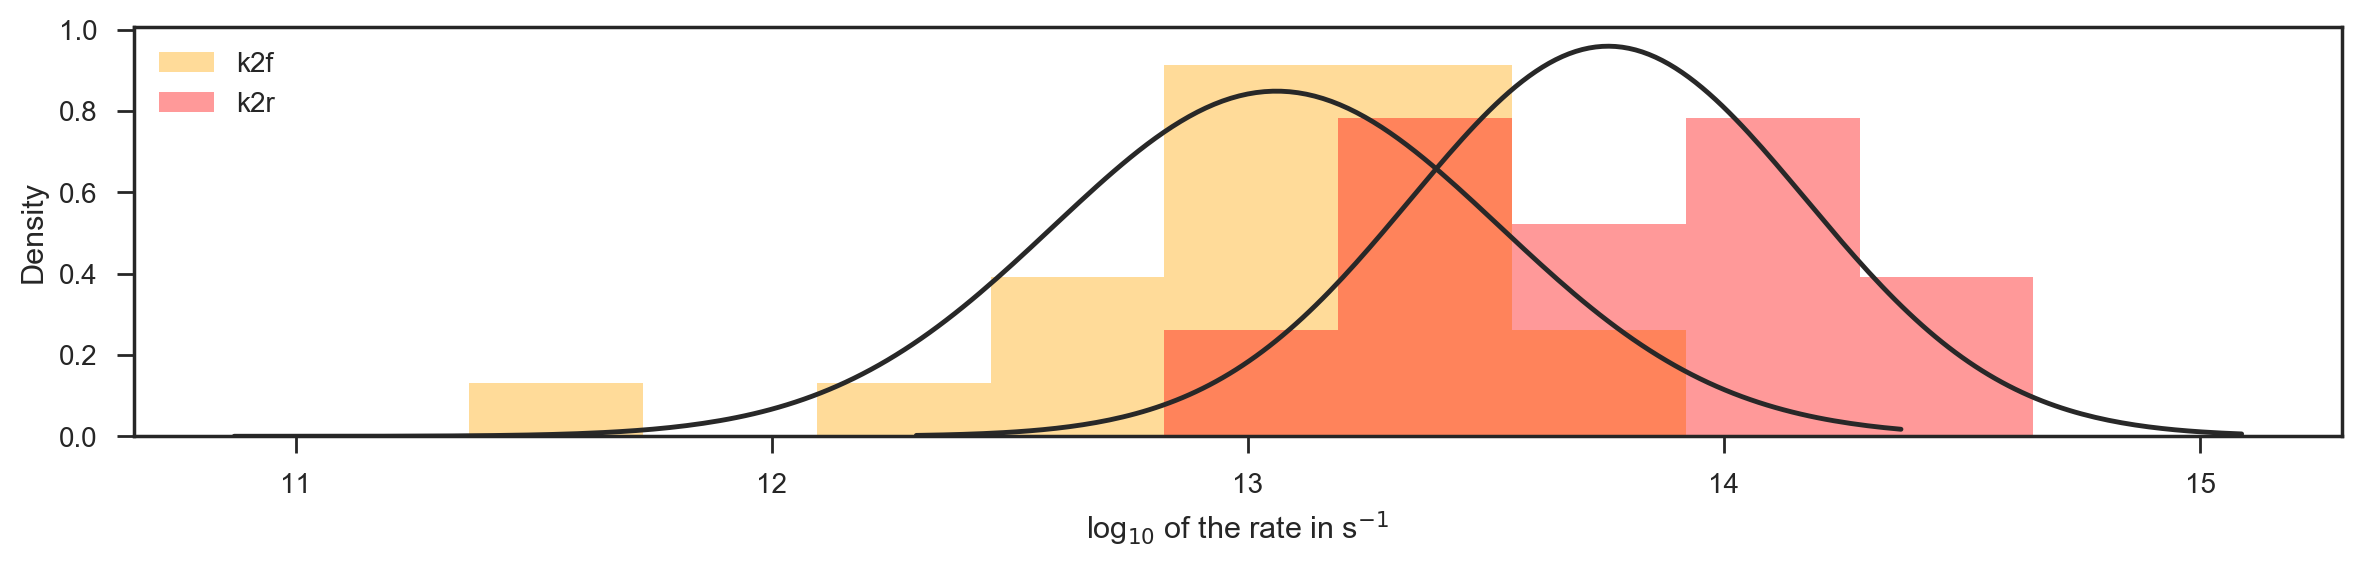

In [42]:
# plot
plt.figure(figsize=(12, 3), dpi=200)

BinMin, BinMax = int(rate_f2.min()), int(rate_f2.max())+1
# Better
#newBins = np.arange(BinMin, BinMax,0.42)
newBins = np.arange(BinMin, BinMax,0.425)
newBins = np.arange(BinMin, BinMax,0.365)

#newBins = np.arange(BinMin, BinMax,0.45)

sns.distplot( rate_f2 , color="orange", fit=norm, kde=None, norm_hist=True, bins=newBins, label='k2f')

BinMin, BinMax = int(rate_r2.min())-1, int(rate_r2.max())+1
newBins = np.arange(BinMin, BinMax,0.425)
newBins = np.arange(BinMin, BinMax,0.365)

sns.distplot( rate_r2 , color="red", fit=norm, kde=None, norm_hist=True,  bins=newBins, label='k2r')

plt.xlabel('log$_{10}$ of the rate in s$^{−1}$')
plt.ylabel('Density')
#plt.title('Histogram of rates for second step in step-wise DPT fit to normal distribution')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('qmmm_gc_step_wise_k2_histogram_new_bins.png')

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


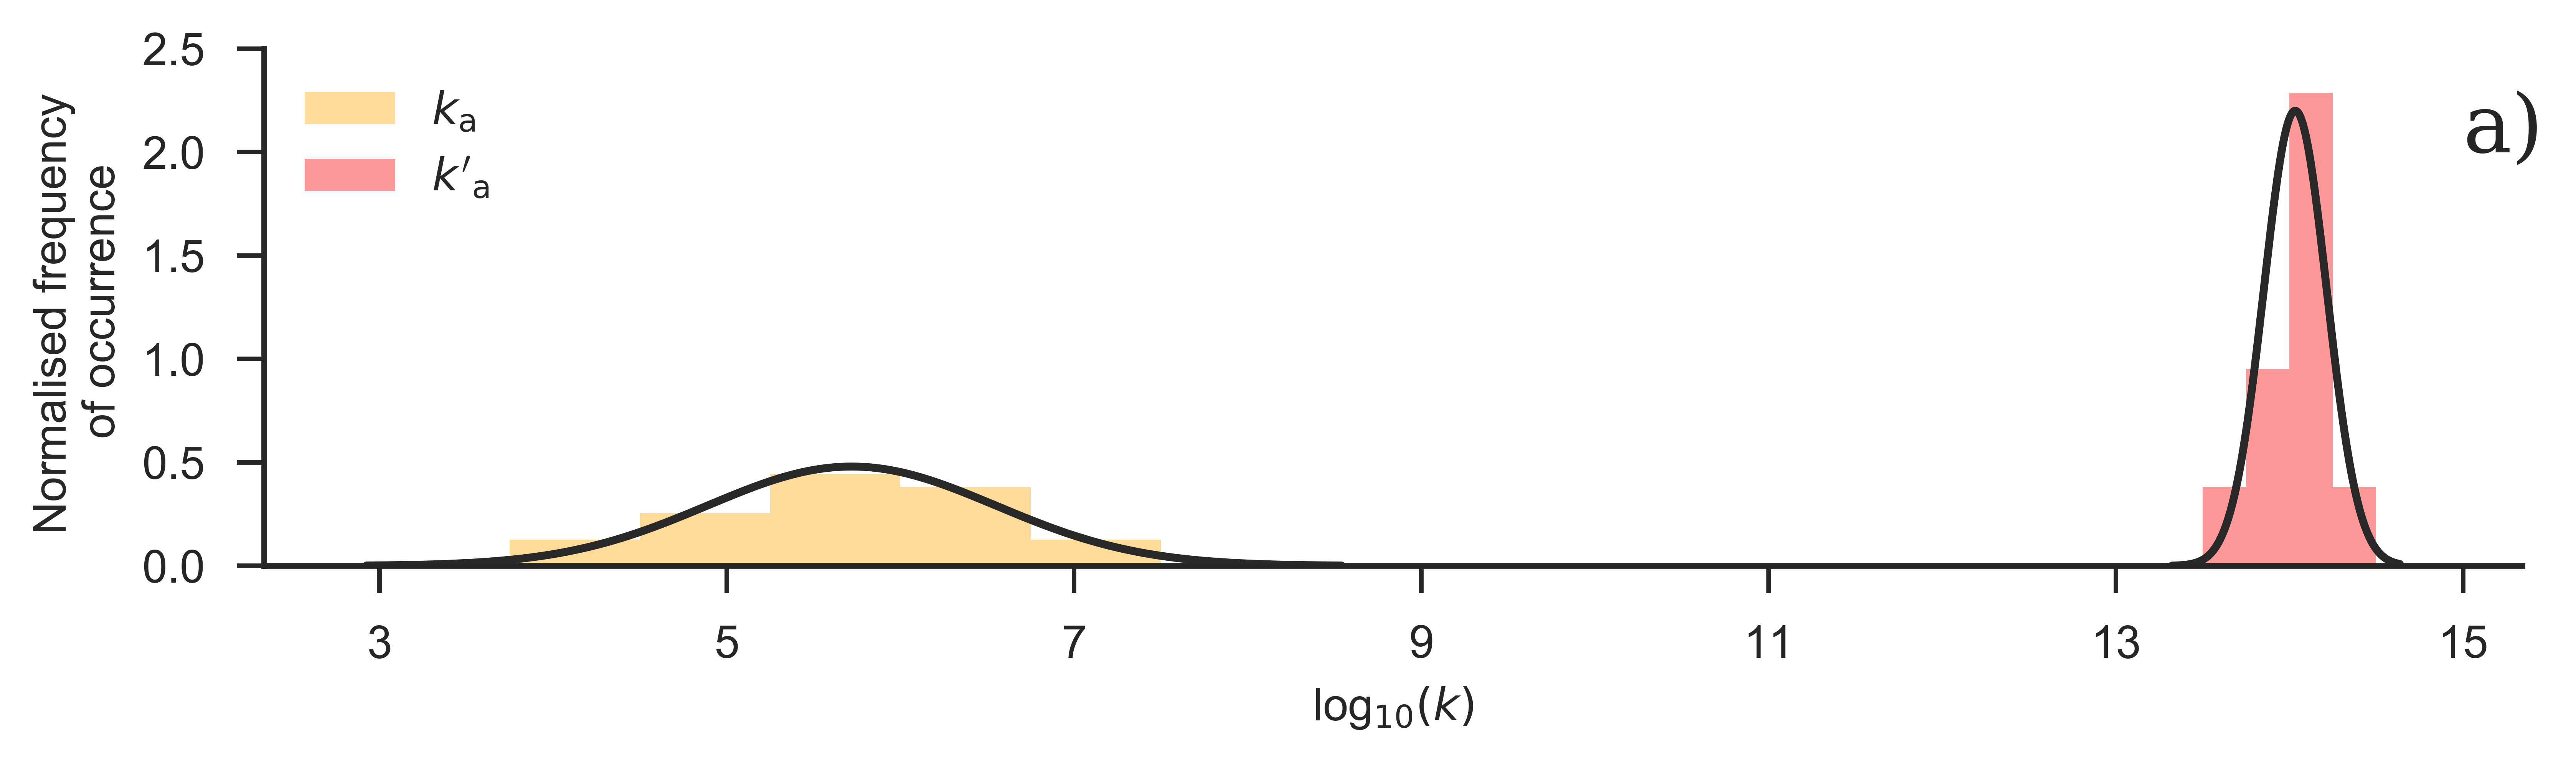

In [43]:
# plot


plt.figure(figsize=(8, 2.5), dpi=850)

BinMin, BinMax = int(rate_f1.min())-1, int(rate_f1.max())+1
newBins = np.arange(BinMin, BinMax,0.75)

sns.despine()
sns.distplot( rate_f1 , color="orange", fit=norm, kde=None, norm_hist=True, bins=newBins, label=r'$k_{\mathrm{a}}$')

BinMin, BinMax = int(rate_r1.min())-1, int(rate_r1.max())+1
newBins = np.arange(BinMin, BinMax,0.25)
sns.despine()
sns.distplot( rate_r1 , color="red", fit=norm, kde=None, norm_hist=True,  bins=newBins, label=r"$k'$$_{\mathrm{a}}$")

plt.xlabel(r'log$_{10}(k)$', fontsize=10)
plt.xticks(np.arange(3,16,2), fontsize=10)

plt.ylabel('Normalised frequency \n of occurrence', fontsize=10)
plt.yticks(np.arange(0,2.75, 0.5), fontsize=10)

#plt.title('Histogram of rates for frist step in step-wise DPT fit to a normal distribution')
plt.legend(loc='upper left', fontsize=10, framealpha=0)

#plt.tight_layout()

sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
})

plt.text(15,2, 'a)', fontsize=18)

sns.set_style("ticks")
sns.despine()
plt.tight_layout()
#plt.savefig('qmmm_gc_step_wise_k1_histogram.png')#, transparent=True)

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


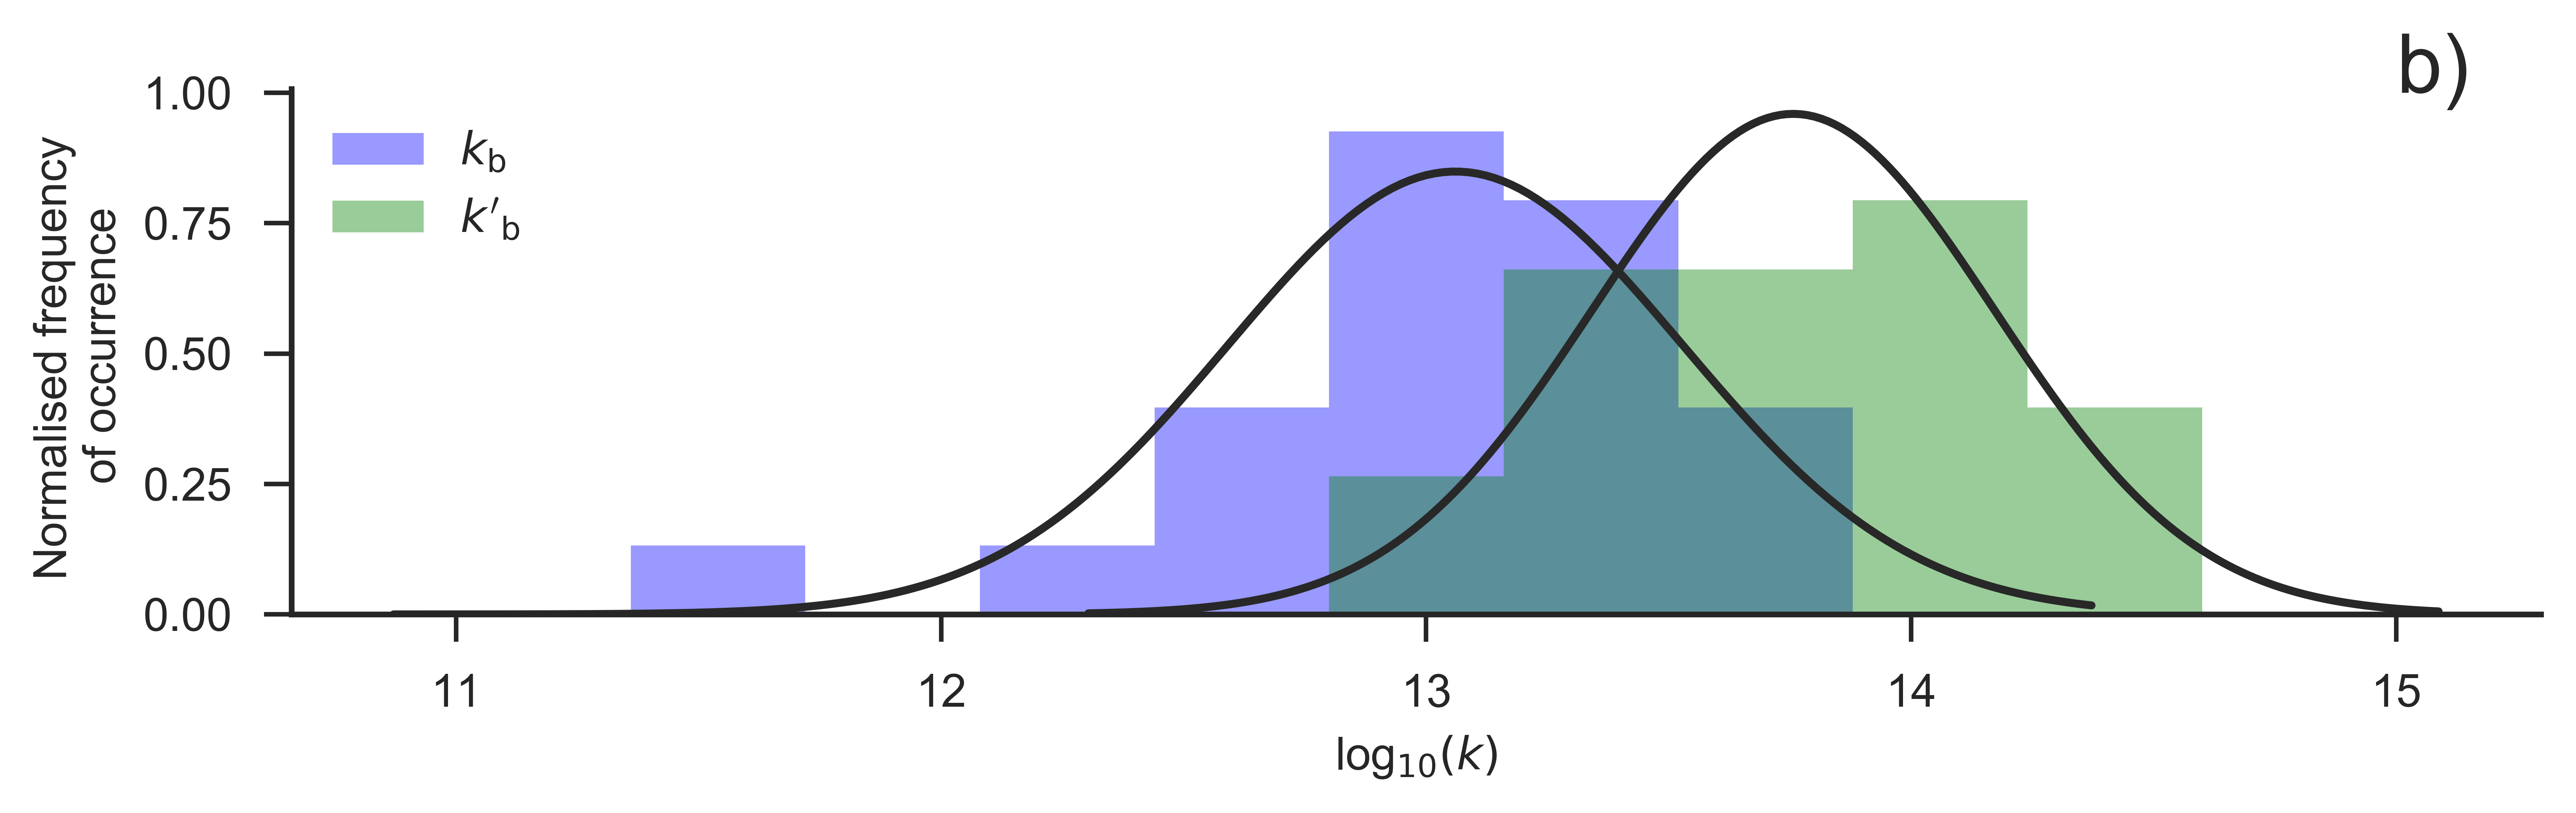

In [45]:
# plot
plt.figure(figsize=(8, 2.5), dpi=850)

BinMin, BinMax = int(rate_f2.min()), int(rate_f2.max())+1
# Better
newBins = np.arange(BinMin, BinMax,0.36)
#newBins = np.arange(BinMin, BinMax,0.225)

sns.distplot( rate_f2 , color="blue", fit=norm, kde=False, norm_hist=False, bins=newBins, label=r'$k_{\mathrm{b}}$')
#sns.distplot( rate_f2 , color="blue", kde=False, norm_hist=True, bins=newBins, label='k2f')

#plt.plot((np.arange(BinMin, BinMax,0.365)-(0.365/2))[2:], (np.array([0]+k2fpoints))[2:], 'd', color='blue',markersize='5', alpha=.95)

BinMin, BinMax = int(rate_r2.min())-1, int(rate_r2.max())+1

newBins = np.arange(BinMin, BinMax,0.36)
#newBins = np.arange(BinMin, BinMax,0.225)

sns.distplot( rate_r2 , color="green", fit=norm, kde=False, norm_hist=False,  bins=newBins, label=r"$k'$$_{\mathrm{b}}$")
#sns.distplot( rate_r2 , color="green", kde=False, norm_hist=True, bins=newBins, label='k2r')

#plt.plot((np.arange(BinMin, BinMax,0.36)-(0.36/2))[-6:], (np.array([0]+k2rpoints[len(k2fpoints):]))[-6:], 'd', color='green',markersize='5',alpha=0.95)

plt.xlabel(r'log$_{10}(k)$', fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel('Normalised frequency \n of occurrence', fontsize=10)
plt.yticks(np.arange(0,1.25, 0.25), fontsize=10)

#plt.title('Histogram of rates for second step in step-wise DPT fit to normal distribution')
plt.legend(loc='upper left', fontsize=10,  framealpha=0)
#plt.tight_layout()
sns.despine()

plt.text(15,1, 'b)', fontsize=18)


plt.tight_layout()
#plt.savefig('qmmm_gc_step_wise_k2_histogram_no_diamonds.png')#, transparent=True)

#plt.savefig('qmmm_gc_step_wise_k2_histogram_no_diamonds_apostrophe.png')#, transparent=True)

#error in the fit of normal



In [46]:
#f_298k_s = 10**np.array(f_298k_log)
#r_298k_s = 10**np.array(r_298k_log)
f1_s = 10**np.array(rate_f1)
r1_s = 10**np.array(rate_r1)

f2_s = 10**np.array(rate_f2)
r2_s = 10**np.array(rate_r2)

keq1 = f1_s/r1_s
keq2 = f2_s/r2_s

keq12 = (f2_s/r2_s)*(f1_s/r1_s)

#t_gc_s = 1/f1_s
#t_int1_s = 1/r1_s
#t_int2_s = 1/f2_s
#t_gct_s = 1/r2_s

In [47]:
(np.log(2)/f1_s).mean()

6.07659951777199e-06

In [48]:
(np.log(2)/f1_s).std()

9.672126466881648e-06

In [53]:
# Effective k
eff_f = f1_s
eff_f

array([  750714.48437695,  3381681.71302886,  1760951.12839725,
         296326.04351499,   141456.15495272,   758365.66031218,
       14149985.36005143,   682268.30300867,    71700.05504961,
         194054.14507105,    37452.31117014,    24968.07517175,
         226884.45602829,  7662349.52383044,   921148.31956789,
          20671.62035269,  1273828.73355893,    36867.93364583,
        4164335.47907422,  3166052.56488103,  3452046.75767312])

In [54]:
eff_r = (r2_s*r1_s)/(r1_s+f2_s)
eff_r

array([2.21611828e+13, 1.21997196e+14, 6.33460542e+13, 7.56996070e+13,
       1.62319502e+14, 5.09750026e+13, 2.07858659e+13, 7.03077895e+12,
       9.44287766e+13, 8.52703775e+12, 2.62434247e+13, 3.17779674e+13,
       2.02812433e+14, 1.03748369e+14, 1.40723163e+13, 1.01422826e+14,
       4.16267997e+13, 1.56430880e+13, 1.86851329e+14, 2.41934952e+14,
       3.41936050e+13])

In [55]:
eff_r.mean()

77504672131549.6

In [56]:
format(eff_r.mean(), "10.2E"), format(eff_r.std(), "10.2E")

('  7.75E+13', '  6.83E+13')

In [57]:
gc_half_l = np.log(2)/eff_f
gc_half_l

array([9.23316647e-07, 2.04971147e-07, 3.93620907e-07, 2.33913689e-06,
       4.90008498e-06, 9.14001275e-07, 4.89857172e-08, 1.01594516e-06,
       9.66731727e-06, 3.57192669e-06, 1.85074608e-05, 2.77613383e-05,
       3.05506685e-06, 9.04614412e-08, 7.52481621e-07, 3.35313424e-05,
       5.44144721e-07, 1.88008145e-05, 1.66448449e-07, 2.18931040e-07,
       2.00793103e-07])

In [58]:
gct_half_l = np.log(2)/eff_r
gct_half_l

array([3.12775354e-14, 5.68166485e-15, 1.09422314e-14, 9.15654927e-15,
       4.27026434e-15, 1.35977861e-14, 3.33470438e-14, 9.85875371e-14,
       7.34042318e-15, 8.12881567e-14, 2.64122228e-14, 2.18121937e-14,
       3.41767598e-15, 6.68104169e-15, 4.92560831e-14, 6.83423256e-15,
       1.66514646e-14, 4.43101248e-14, 3.70961868e-15, 2.86501464e-15,
       2.02712519e-14])

In [59]:
format(gct_half_l.mean(), "10.2E"), format(gct_half_l.std(), "10.2E")

('  2.37E-14', '  2.53E-14')

In [60]:
keq1, keq2, keq12

(array([7.42259099e-09, 2.57922236e-08, 2.26088932e-08, 2.66246267e-09,
        8.95187167e-10, 8.74722037e-09, 9.28613924e-08, 9.53484582e-09,
        6.64887703e-10, 1.94055300e-09, 8.84263779e-10, 2.30986292e-10,
        1.28367384e-09, 4.98581844e-08, 1.77812966e-08, 3.47711753e-10,
        1.19983854e-08, 2.54158473e-10, 3.68417683e-08, 1.47123475e-08,
        1.81272300e-08]),
 array([1.25944402, 0.10235228, 0.00712431, 0.29689343, 0.03463492,
        0.03903546, 0.33465607, 3.00774793, 0.10226725, 2.93580687,
        0.26840344, 0.72564315, 0.1548213 , 0.09217132, 1.18011566,
        0.07717165, 0.49579948, 1.52193093, 0.03151171, 0.01701991,
        0.20562082]),
 array([9.34833784e-09, 2.63989300e-09, 1.61072723e-10, 7.90467662e-10,
        3.10047367e-11, 3.41451756e-10, 3.10766286e-08, 2.86784128e-08,
        6.79962387e-11, 5.69708883e-09, 2.37339442e-10, 1.67613620e-10,
        1.98740056e-10, 4.59549473e-09, 2.09839866e-08, 2.68334896e-11,
        5.94879329e-09, 3.868116

In [61]:
np.log10((keq12).mean()), np.log10((keq12).std())

(-8.255831294712648, -8.035688915202638)

In [62]:
keq12.mean()

5.548412037601644e-09

/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alex/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


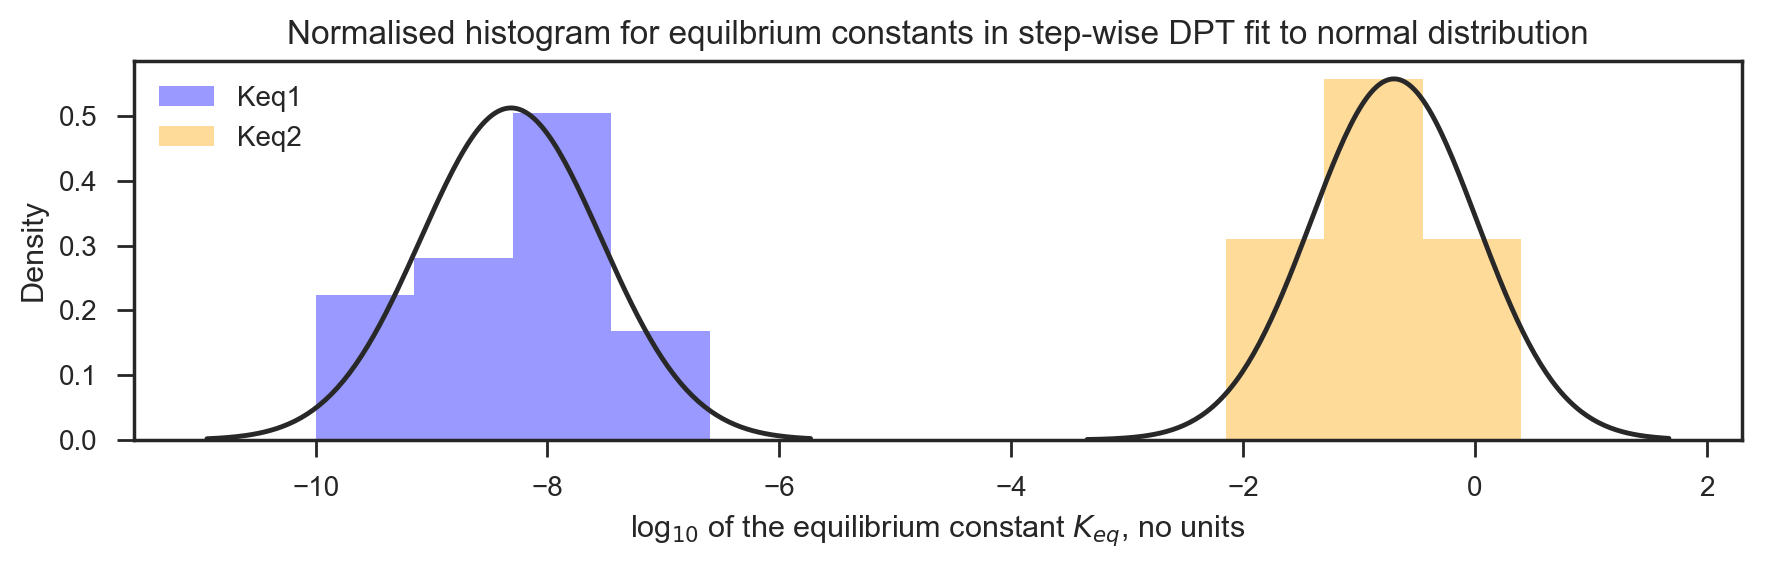

In [63]:
# plot
plt.figure(figsize=(9, 3), dpi=200)

BinMin, BinMax = int(np.log10(keq1).min())-1, int(np.log10(keq1).max()+1)
newBins = np.arange(BinMin, BinMax,0.85)

sns.distplot( np.log10(keq1) , color="blue", fit=norm, kde=None, norm_hist=True,  bins=newBins, label='Keq1')

BinMin, BinMax = int(np.log10(keq2).min())-1, int(np.log10(keq2).max())+1
newBins = np.arange(BinMin, BinMax,0.85)

sns.distplot( np.log10(keq2) , color="orange", fit=norm, kde=None, norm_hist=True,  bins=newBins, label='Keq2')

plt.xlabel('log$_{10}$ of the equilibrium constant $K_{eq}$, no units')
plt.ylabel('Density')
plt.title('Normalised histogram for equilbrium constants in step-wise DPT fit to normal distribution')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('qmmm_gc_step_wise_keq_histogram.png') 

In [64]:
d_kinetics = { 'k1f':f1_s, 'k1r':r1_s, 'k2f':f2_s, 'k2r':r2_s, 'keff_f':eff_f, 'keff_r':eff_r, 'keq1':f1_s/r1_s, 'keq2':f2_s/r2_s, 'keq1,2':keq12, 'gc_half_t':gc_half_l, 'gct_half_t':gct_half_l }

df_kinetics = pd.DataFrame(data=d_kinetics)
df_kinetics.head()

,k1f,k1r,k2f,k2r,keff_f,keff_r,keq1,keq2,"keq1,2",gc_half_t,gct_half_t
0,7.507145e+05,1.011391e+14,3.854887e+13,3.060785e+13,7.507145e+05,2.216118e+13,7.422591e-09,1.259444,9.348338e-09,9.233166e-07,3.127754e-14
1,3.381682e+06,1.311125e+14,1.380106e+13,1.348388e+14,3.381682e+06,1.219972e+14,2.579222e-08,0.102352,2.639893e-09,2.049711e-07,5.681665e-15
2,1.760951e+06,7.788754e+13,4.539270e+11,6.371523e+13,1.760951e+06,6.334605e+13,2.260889e-08,0.007124,1.610727e-10,3.936209e-07,1.094223e-14
3,2.963260e+05,1.112977e+14,2.816145e+13,9.485373e+13,2.963260e+05,7.569961e+13,2.662463e-09,0.296893,7.904677e-10,2.339137e-06,9.156549e-15
4,1.414562e+05,1.580185e+14,5.829316e+12,1.683075e+14,1.414562e+05,1.623195e+14,8.951872e-10,0.034635,3.100474e-11,4.900085e-06,4.270264e-15


In [66]:
d_kinetics_mean = {'k1f':f1_s.mean(), 'k1r':r1_s.mean(), 'k2f':f2_s.mean(), 'k2r':r2_s.mean(), 'keq1':(f1_s/r1_s).mean(), 'keq2':(f2_s/r2_s).mean(), 'keq1,2':keq12.mean()}
#, 'gc_t':t_gc_s.mean(), 'gc_int_t':t_int1_s.mean(), 'gc_taut_t':t_gct_s.mean()} 

format(d_kinetics_mean['k1f'], '10.2E')


'  2.06E+06'

In [67]:
format(d_kinetics['keq1,2'].mean(), '10.2E')

'  5.55E-09'

In [68]:
(np.log10(f1_s)).mean(), np.log10(f1_s).std(), np.log10(f1_s).std() / np.log10(f1_s).mean() * 100

(5.719114931779428, 0.8312851962885058, 14.535207041727736)

In [69]:
np.log10(r1_s).mean(), np.log10(r1_s).std(), np.log10(r1_s).std() / np.log10(r1_s).mean() * 100

(14.033527454913857, 0.18136802039270636, 1.2923908188828186)

In [70]:
(np.log10(f2_s)).mean(), np.log10(f2_s).std(), np.log10(f2_s).std() / np.log10(f2_s).mean() * 100

(13.060302756260379, 0.4699853329677011, 3.598579158070562)

In [71]:
np.log10(r2_s).mean(), np.log10(r2_s).std(), np.log10(r2_s).std() / np.log10(r2_s).mean() * 100

(13.75694967060114, 0.4158386088982817, 3.022753000157707)

In [72]:
np.log10(f1_s/r1_s).mean(), np.log10(f1_s/r1_s).std(), np.log10(f1_s/r1_s).std() / np.log10(f1_s/r1_s).mean() * 100

(-8.31441252313443, 0.7783742969144806, -9.361747384420651)

In [73]:
np.log10(f2_s/r2_s)

array([ 0.10017887, -0.98990246, -2.1472573 , -0.52739942, -1.4604858 ,
       -1.40854072, -0.47540129,  0.47824144, -0.99026341,  0.46772748,
       -0.57121192, -0.1392769 , -0.81016928, -1.03540419,  0.07192457,
       -1.11254222, -0.30469393,  0.18239494, -1.50152803, -1.76904271,
       -0.68693292])

In [74]:
np.log10(f2_s/r2_s).mean(), np.log10(f2_s/r2_s).std(), np.log10(f2_s/r2_s).std() / np.log10(f2_s/r2_s).mean() * 100

(-0.6966469143407619, 0.715721121695605, -102.73800213023165)

In [75]:
((f1_s/r1_s).mean()-(f1_s/r1_s).std())*3*10**9, ((f1_s/r1_s).mean())*3*10**9, ((f1_s/r1_s).mean()+(f1_s/r1_s).std())*3*10**9

(-18.451782039940188, 46.49289476380204, 111.43757156754428)

In [76]:
def print_results(x, y=str):
    return y, format(x[y].mean(),"10.2E"), format(x[y].std(),"10.2E"), round(x[y].std()/x[y].mean()*100, 1)

In [77]:
print_results(df_kinetics, 'k1f')

('k1f', '  2.06E+06', '  3.38E+06', 164.3)

In [78]:
print_results(df_kinetics, 'k1r')

('k1r', '  1.17E+14', '  4.60E+13', 39.3)

In [79]:
print_results(df_kinetics, 'k2f')

('k2f', '  1.72E+13', '  1.27E+13', 73.6)

In [80]:
print_results(df_kinetics, 'k2r')

('k2r', '  8.61E+13', '  7.51E+13', 87.3)

In [81]:
print_results(df_kinetics, 'keq1')

('keq1', '  1.55E-08', '  2.22E-08', 143.1)

In [82]:
print_results(df_kinetics, 'keq2')

('keq2', '  6.14E-01', '  9.00E-01', 146.6)

In [83]:
print_results(df_kinetics, 'keq1,2')

('keq1,2', '  5.55E-09', '  9.44E-09', 170.1)

In [84]:
print_results(df_kinetics*0.84, 'keq1,2')

('keq1,2', '  4.66E-09', '  7.93E-09', 170.1)

In [85]:
keq12.mean()*(1.5*10**9)

8.322618056402465

In [86]:
keq12.std()*(1.5*10**9)

13.816636878770893

In [87]:
keq1.mean(), keq1.std()

(1.5497631587934015e-08, 2.164822560124741e-08)

In [88]:
keq2.mean(), keq2.std()

(0.6138177102444196, 0.8782744874755611)

In [89]:
keq12.mean(), keq12.std()

(5.548412037601644e-09, 9.211091252513928e-09)

In [90]:
keq12.mean()*0.84, keq12.std()*0.84

(4.660666111585381e-09, 7.737316652111699e-09)

In [91]:
keq_w = keq12*0.84

In [92]:
g_t = keq_w * (1.5*10**9)
g_t

array([1.17789057e+01, 3.32626519e+00, 2.02951631e-01, 9.95989254e-01,
       3.90659682e-02, 4.30229213e-01, 3.91565520e+01, 3.61348001e+01,
       8.56752608e-02, 7.17833193e+00, 2.99047697e-01, 2.11193161e-01,
       2.50412471e-01, 5.79032335e+00, 2.64398231e+01, 3.38101968e-02,
       7.49547954e+00, 4.87382668e-01, 1.46279337e+00, 3.15507586e-01,
       4.69644313e+00])

In [93]:
(g_t/(1.5*10**9)).mean()

4.660666111585381e-09

In [94]:
((g_t/(1.5*10**9))*100).mean()

4.660666111585381e-07

In [95]:
8/(1.5*10**9)

5.333333333333333e-09

In [96]:
(keq12*0.84).std()

7.737316652111697e-09

In [100]:
d_thermo = { 'ts1':gibbs_ts1, 'int':gibbs_int, 'ts2':gibbs_ts2, 'prod':gibbs_prod }
df_thermo = pd.DataFrame(data=d_thermo)
df_thermo

,ts1,int,ts2,prod
0,10.052150,11.159391,10.512609,11.021875
1,9.101051,10.416846,10.428928,11.775697
2,9.389819,10.495378,12.421740,13.442945
3,11.320104,11.770622,11.310696,12.494590
4,11.167866,12.420423,12.918390,14.425250
5,10.005988,11.061497,12.229738,12.995019
6,8.689879,9.653142,9.905000,10.305731
7,10.484717,11.010098,10.447805,10.353610
8,11.453710,12.597730,12.735564,13.957077
9,10.882548,11.959175,11.545637,11.317120


In [101]:
def print_results(x, y=str):
    return y, format(x[y].mean(),".2f"), format(x[y].std(),".2f"), round(x[y].std()/x[y].mean()*100, 1)

In [102]:
print_results(df_thermo, 'ts1')

('ts1', '10.38', '1.11', 10.7)

In [103]:
print_results(df_thermo, 'int')

('int', '11.41', '1.09', 9.6)

In [104]:
print_results(df_thermo, 'ts2')

('ts2', '11.50', '1.14', 9.9)

In [105]:
print_results(df_thermo, 'prod')

('prod', '12.37', '1.31', 10.6)

In [106]:
e_ts1.mean(), e_ts1.std(), (e_ts1.std()/e_ts1.mean())*100

(13.977194243458163, 1.1194577283082023, 8.009173435020047)

In [107]:
e_int.mean(), e_int.std(), (e_int.std()/e_int.mean())*100

(13.354159322017273, 1.1781754143294567, 8.822535256015518)

In [108]:
e_ts2.mean(), e_ts2.std(), (e_ts2.std()/e_ts2.mean())*100

(14.888545128937604, 1.1765968931773843, 7.902698907031101)

In [109]:
e_prod.mean(), e_prod.std(), (e_prod.std()/e_prod.mean())*100

(13.489640284162643, 1.110107093801023, 8.229330585666775)

In [110]:
# Alya Eqn

# Defines % conc after 1 s
def taut_conc(kf, kr, t=1):
    prod_init = 0
    reac_init = 1
    conc=((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t))*100
    return conc

# iterates through time (x) and returns % conc after 1 s (y)
def time_max_conc(kf, kr):
    prod_init = 0
    reac_init = 1
    log_t= np.logspace(-17,0,1000)
    
    x, y = [], []
    for t in log_t:
        x.append(t), y.append((((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t)))*100)
    
    return x,y

# Finds the first case for (y) value to equal y[-1]
def turning_point(x):
    for i in np.arange(len(x[1])):
        if x[1][i] == x[1][-1]:
            break
    return x[0][i]

In [111]:
# The times at which conc reaches eqlm
turning_points = []
for i in np.arange(len(eff_f)):
    f_values = time_max_conc(eff_f[i], eff_r[i])
    turning_points.append(turning_point(f_values))
    
print(turning_points)

[1.7427746784089175e-12, 2.988652873550395e-13, 6.050367879391212e-13, 4.973895958790078e-13, 2.36250846547795e-13, 7.359814475265786e-13, 1.8124175473742394e-12, 5.429186177618943e-12, 4.088948226294856e-13, 4.463233926710397e-12, 1.4327029534098352e-12, 1.2248646137509333e-12, 1.8675458427610742e-13, 3.635469961293318e-13, 2.681812609453018e-12, 3.780746663599357e-13, 9.310413487069085e-13, 2.47967289250216e-12, 2.0197857568198865e-13, 1.5966260221014285e-13, 1.1325413151528127e-12]


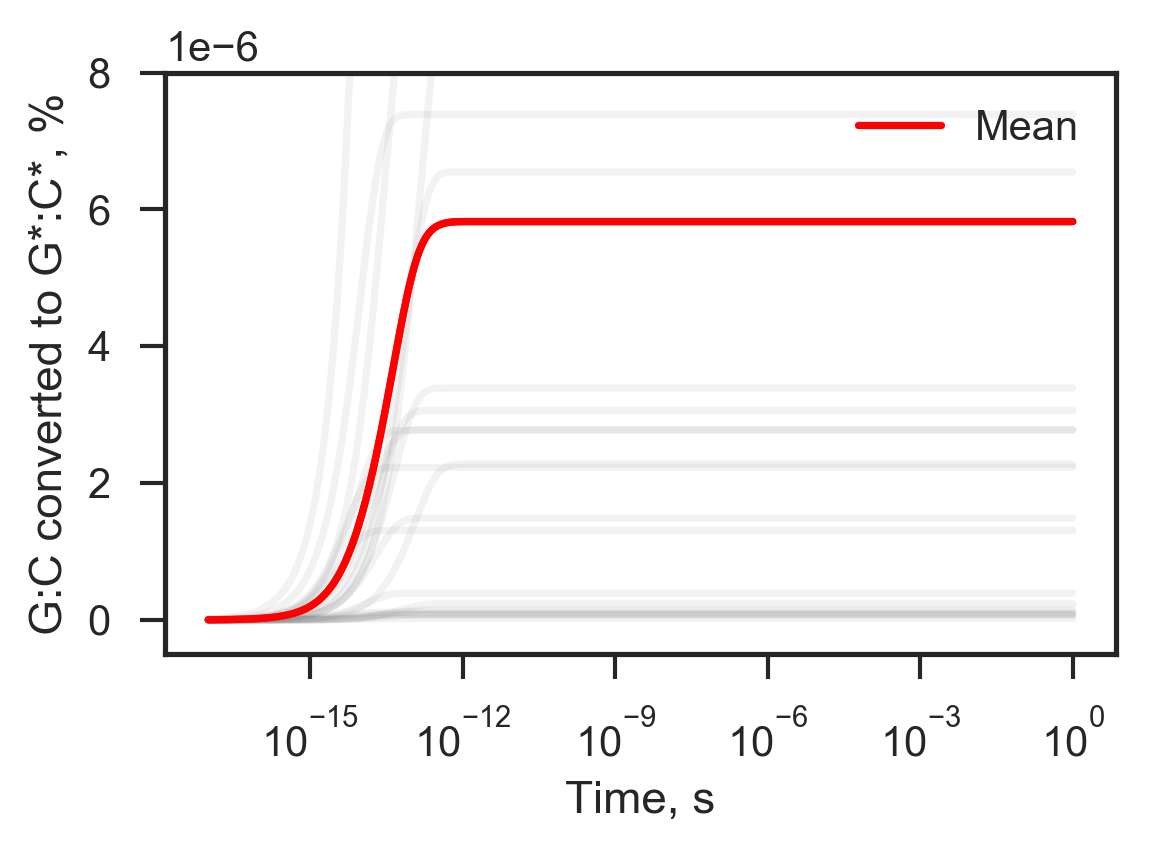

In [112]:
# Create a list of lists with all concentrations 
concs = []
for i in np.arange(len(eff_f)):
    concs.append(time_max_conc(eff_f[i], eff_r[i])[1])

# Create a list of lists with the mean concs at each time, t, and stdev
concs_mean = []
std_mean = []

for n in np.arange(len(concs[0])):
    lst2 = [item[n] for item in concs]
    mean = np.array(lst2).mean()
    std = np.array(lst2).std()
    concs_mean.append(mean)
    std_mean.append(std)

log_t= np.logspace(-17,0,1000)

plt.figure(figsize=(4,3), dpi=300)

plt.plot( log_t, concs_mean, 'red')
plt.xscale('log')

plt.legend(['Mean'], loc='upper right')

for i in np.arange(len(eff_f)):
    x, y = time_max_conc(eff_f[i], eff_r[i])
    plt.plot(x,y, 'grey', alpha=0.1)

plt.plot( log_t, concs_mean, 'red')
    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ylim(bottom=-0.5e-6, top=8e-6)
plt.yticks(np.linspace(0, 8e-6, 5))
plt.ylabel('G:C converted to G*:C*, %')# r'$\times 10^{-6}$')
plt.xlabel('Time, s')
plt.tight_layout()

In [113]:
# Alya eqn
kf = f1_s.mean()
kr = r1_s.mean()
prod_init = 0
reac_init = 1
t = 1

((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t))*100

1.7550846463233859e-06

In [114]:
conc_f1_s = np.array([3.47496093e+05, 1.02885227e+04, 2.04059609e+02])
conc_r1_s = np.array([1.78877094e+13, 5.42811008e+12, 7.68347010e+10])

In [115]:
kf = f1_s.mean()
kr = r1_s.mean()

prod_init = 0
reac_init = 1-prod_init

log_t = np.logspace(-17,0,1000)
log_t

x, y = [], []
for t in log_t:
    x.append(t), y.append((((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t)))*100)
    
y = np.array(y)
x = np.array(x)

derivative = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

d = {'time':x[:-1], 'derivative':derivative}
#print(pd.DataFrame(data=d).to_csv())

# Mean: 3.232283978181381e-13

In [116]:
kf = f1_s.std()
kr = r1_s.std()

prod_init = 0
reac_init = 1-prod_init

log_t = np.logspace(-17,0,1000)
log_t

x, y = [], []
for t in log_t:
    x.append(t), y.append((((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t)))*100)
    
y = np.array(y)
x = np.array(x)

derivative = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

d = {'time':x[:-1], 'derivative':derivative}
#print(pd.DataFrame(data=d).to_csv())

# STD : 8.608647696149245e-13

In [117]:
prod_init = 0
reac_init = 1
#t = 1
log_t = np.logspace(-17,0,1000)
log_t

times, concs=[],[]
for n in np.arange(len(f1_s)):
    kf = np.array(f1_s[n])
    kr = np.array(r1_s[n])
    

    x, y = [], []
    for t in log_t:
        x.append(t), y.append((((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t)))*100)
    
    times.append(x)
    concs.append(y)   

In [118]:
prod_init = 0
reac_init = 1
#t = 1
log_t = np.logspace(-17,0,1000)
log_t

times, conc_concs=[],[]
for n in np.arange(len(conc_f1_s)):
    kf = np.array(conc_f1_s[n])
    kr = np.array(conc_r1_s[n])
    

    x, y = [], []
    for t in log_t:
        x.append(t), y.append((((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t)))*100)
    
    times.append(x)
    concs.append(y) 
    
concs_mean = []
std_mean = []

for n in np.arange(len(concs[0])):
    lst2 = [item[n] for item in concs]
    mean = np.array(lst2).mean()
    std = np.array(lst2).std()
    concs_mean.append(mean)
    std_mean.append(std)

In [119]:
concs_mean

[1.8125387200879412e-09,
 1.8849154824830753e-09,
 1.960180091644505e-09,
 2.038447590612174e-09,
 2.1198375905083147e-09,
 2.2044744507120053e-09,
 2.292487466039413e-09,
 2.3840110611969557e-09,
 2.4791849927790425e-09,
 2.5781545590944323e-09,
 2.681070818114478e-09,
 2.788090813845738e-09,
 2.8993778114415503e-09,
 3.0151015413757774e-09,
 3.1354384530147007e-09,
 3.260571977933488e-09,
 3.3906928033340214e-09,
 3.5259991559359926e-09,
 3.6666970967200304e-09,
 3.813000826920024e-09,
 3.9651330056684575e-09,
 4.123325079715907e-09,
 4.287817625655858e-09,
 4.45886070510199e-09,
 4.636714233274668e-09,
 4.821648361471718e-09,
 5.0139438739084195e-09,
 5.213892599428152e-09,
 5.4217978385970636e-09,
 5.637974806712944e-09,
 5.862751093270477e-09,
 6.0964671384393375e-09,
 6.339476727128727e-09,
 6.592147501221566e-09,
 6.854861490579169e-09,
 7.128015663430344e-09,
 7.412022496770881e-09,
 7.707310567415158e-09,
 8.0143251643517e-09,
 8.333528923070358e-09,
 8.665402482537439e-09,
 9

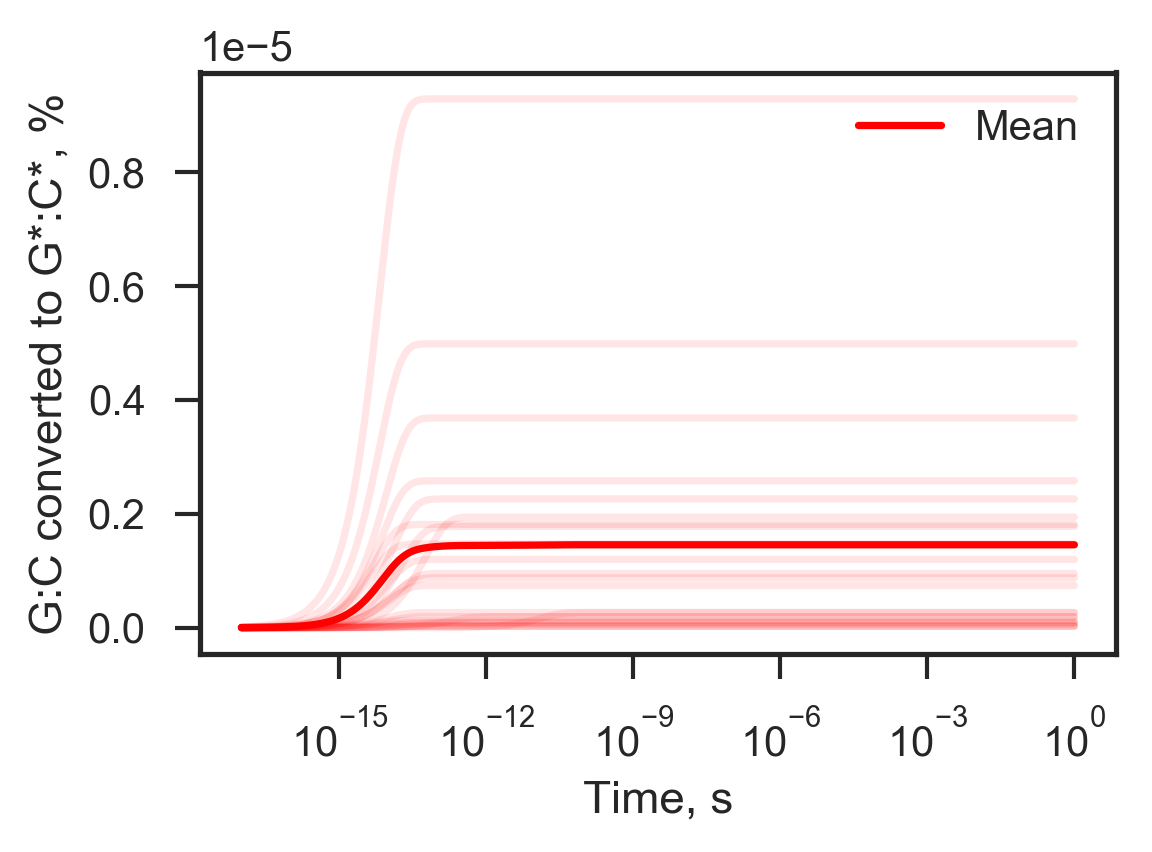

In [120]:
kf = f1_s.mean()
kr = r1_s.mean()

kf_c = conc_f1_s.mean()
kr_c = conc_r1_s.mean()

prod_init = 0
reac_init = 1-prod_init

log_t = np.logspace(-17,0,1000)
log_t

x, y = [], []
for t in log_t:
    x.append(t), y.append((((kf*reac_init - kr*prod_init)/(kf+kr))*(1 - np.exp(-(kf+kr)*t)))*100)

plt.figure(figsize=(4,3), dpi=300)
#plt.plot(x,y, 'r')

plt.plot(x,concs_mean, 'red')

plt.legend(['Mean'], loc='upper right')

for m in np.arange(len(concs)):
    plt.plot(x, concs[m], 'red', alpha=0.1)


plt.xscale('log')
#plt.xticks(np.logspace(-17,0, 18))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.yticks(np.linspace(0, 2e-6, 5))
plt.ylabel('G:C converted to G*:C*, %')# r'$\times 10^{-6}$')
plt.xlabel('Time, s')
plt.tight_layout()



plt.savefig('gc_step_to_taut_over_time.png')
plt.show()


In [121]:
kf_c = conc_f1_s.mean()
kr_c = conc_r1_s.mean()

prod_init = 0
reac_init = 1-prod_init

log_t = np.logspace(-17,0,1000)
x, y = [], []
for t in log_t:
    x.append(t), y.append((((kf_c*reac_init - kr_c*prod_init)/(kf_c+kr_c))*(1 - np.exp(-(kf_c+kr_c)*t)))*100)

y = np.array(y)
x = np.array(x)

derivative = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

d = {'time':x[:-1], 'derivative':derivative}
#print(pd.DataFrame(data=d).to_csv())

# Mean: 4.827070965603188e-12

In [122]:
def calc_deriv(x, y):
    y = np.array(y)
    x = np.array(x)
    derivative = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])
    return x,derivative

In [123]:
y = np.array(y)
x = np.array(x)
derivative = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

plateu = np.where(derivative == 0)
type(plateu)

tuple

In [124]:
kf_c = conc_f1_s.std()
kr_c = conc_r1_s.std()

prod_init = 0
reac_init = 1-prod_init

log_t = np.logspace(-17,0,1000)
x, y = [], []
for t in log_t:
    x.append(t), y.append((((kf_c*reac_init - kr_c*prod_init)/(kf_c+kr_c))*(1 - np.exp(-(kf_c+kr_c)*t)))*100)

y = np.array(y)
x = np.array(x)

derivative = (y[1:]-y[0:-1])/(x[1:]-x[0:-1])

d = {'time':x[:-1], 'derivative':derivative}
print(pd.DataFrame(data=d).to_csv())

# Stdev: 5.0199651331100795e-12

,time,derivative
0,1e-17,16137834.00753231
1,1.0399609139541225e-17,16137784.926826518
2,1.0815187025522848e-17,16137733.883863546
3,1.1247371783647508e-17,16137680.802178916
4,1.169682703970387e-17,16137625.599296317
5,1.2164242938573729e-17,16137568.190872043
6,1.2650337203959012e-17,16137508.488286626
7,1.3155856240457052e-17,16137446.39993433
8,1.368157627967476e-17,16137381.83144717
9,1.4228304572143492e-17,16137314.682357851
10,1.4796880626863963e-17,16137244.850364769
11,1.5388177500383495e-17,16137172.228263142
12,1.6003103137386953e-17,16137096.70437561
13,1.664260176485902e-17,16137018.162941715
14,1.7307655341957275e-17,16136936.483450433
15,1.799928506782484e-17,16136851.54031628
16,1.8718552949655755e-17,16136763.203024795
17,1.9466563433422632e-17,16136671.336285984
18,2.0244465099768102e-17,16136575.799303958
19,2.1053452427666998e-17,16136476.445070663
20,2.1894767628566207e-17,16136373.12076016
21,2.2769702553816845e-17,16136265.669009741
22,2.367960067833069e-17,16136

In [126]:
np.arange(0, 2e-6, 5)


array([0.])

In [127]:
#np.arange(0.000000, 0.2, 5)
np.linspace(0, 2e-6, 5)

array([0.0e+00, 5.0e-07, 1.0e-06, 1.5e-06, 2.0e-06])